In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from analysis import get_data
from analysis import read_log, read_logs
from analysis import generate_average

In [3]:
size = 1000
tag = "multiprocessing_mergesort"

In [6]:
data = []

for file in ["alex", "gregor"]:
    _data = read_log(file, size=size)
    data = data + _data

FileNotFoundError: [Errno 2] No such file or directory: 'log/alex-1000.log'

In [30]:
data

[[['multiprocessing_mergesort',
   1,
   100,
   0,
   0.389,
   0.389,
   'macbookproi7_2400MHz',
   'alex'],
  ['multiprocessing_mergesort',
   1,
   100,
   1,
   0.319,
   0.319,
   'macbookproi7_2400MHz',
   'alex'],
  ['multiprocessing_mergesort',
   1,
   100,
   2,
   0.322,
   0.322,
   'macbookproi7_2400MHz',
   'alex'],
  ['multiprocessing_mergesort',
   1,
   100,
   3,
   0.318,
   0.318,
   'macbookproi7_2400MHz',
   'alex'],
  ['multiprocessing_mergesort',
   1,
   100,
   4,
   0.315,
   0.315,
   'macbookproi7_2400MHz',
   'alex'],
  ['multiprocessing_mergesort',
   1,
   100,
   5,
   0.313,
   0.313,
   'macbookproi7_2400MHz',
   'alex'],
  ['multiprocessing_mergesort',
   1,
   100,
   6,
   0.318,
   0.318,
   'macbookproi7_2400MHz',
   'alex'],
  ['multiprocessing_mergesort',
   1,
   100,
   7,
   0.316,
   0.316,
   'macbookproi7_2400MHz',
   'alex'],
  ['multiprocessing_mergesort',
   1,
   100,
   8,
   0.316,
   0.316,
   'macbookproi7_2400MHz',
   'alex'],
 

In [31]:
def new_data(data):
    ndata = []
    for entry in data:
        nentry = entry[1:5]
        ndata.append(nentry)
    return ndata

In [32]:
for i in range(len(data)):
    data[i] = new_data(data[i])

In [33]:
import pandas as pd
def get_data_really(data):
    x = []
    y = []

    for entry in data:
        p, s, count, t = entry
        x.append(p)
        y.append(t)
    return x, y

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_result(x, y, label, size):
    sns.set_theme(style="darkgrid")
    
    df = pd.DataFrame({'processes': x, 'time': y})
    avg = df.groupby(['processes']).mean()
    ax = sns.lineplot(x="processes", y="time", data=avg)
    ax.set_title(f"{label}, size={size}")
    ax.set_ylabel("Time/s")
    ax.set_xlabel("Processes")
    plt.show()

def format_plot():
    ax.set_title(f"{label}, size={size}")
    ax.set_ylabel("Time/s")
    ax.set_xlabel("Processes")

In [45]:
def get_mean(x, y):
    df = pd.DataFrame({'processes': x, 'time': y})
    avg = df.groupby(['processes']).mean()
    return avg

In [48]:
for i in range(len(data)):
    x, y = get_data_really(data[i])
    df = get_mean(x, y)
    print(df['time'].tolist())

[0.32389999999999997, 0.30419999999999997, 0.3101, 0.3238, 0.3417, 0.3842, 0.4282, 0.5203, 0.5469999999999999, 0.7205999999999999, 0.6899, 0.7426999999999999]
[0.0105, 0.0047, 0.004, 0.005200000000000001, 0.0057, 0.0066, 0.0075, 0.0082, 0.008799999999999999, 0.0097, 0.0103, 0.011300000000000001, 0.0116, 0.011899999999999999, 0.013500000000000002, 0.013600000000000001, 0.014799999999999999, 0.0155, 0.0166, 0.016900000000000002, 0.017, 0.0172, 0.0195, 0.019200000000000002, 0.019700000000000002, 0.02, 0.020999999999999998, 0.0216, 0.0225, 0.022600000000000002, 0.0231, 0.0235]


ValueError: x and y must have same first dimension, but have shapes (120,) and (12,)

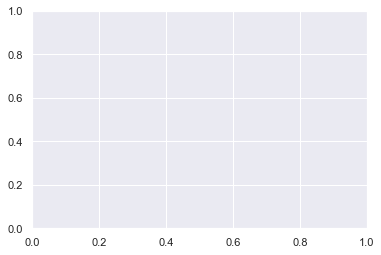

In [50]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# plot lines
for i in range(len(data)):
    x, y = get_data_really(data[i])
    df = get_mean(x, y)
    z = df['time'].tolist()
    plt.plot(x, z, label = f"line {i}")
plt.legend()
plt.show()

# ax = sns.lineplot(x="processes", y="time", data=avg)
# ax.set_title(f"{label}, size={size}")
# ax.set_ylabel("Time/s")
# ax.set_xlabel("Processes")
# plt.show()

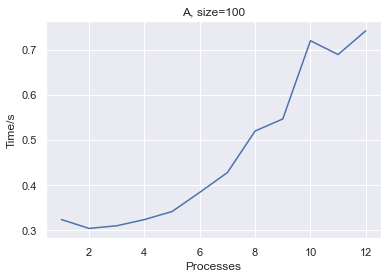

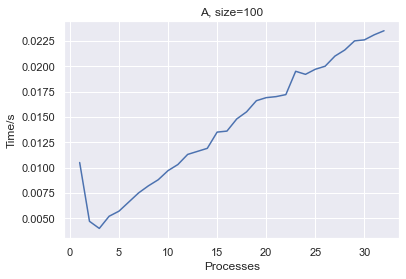

In [35]:
for i in range(len(data)):
    x, y = get_data_really(data[i])
    plot_result(x, y, "A", 100)

In [36]:
from analysis import avg_processes_time_fixed_size
avg_processes_time_fixed_size(data, 100, name=None, processes=None, label=sort)

ValueError: too many values to unpack (expected 8)